In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv('/content/3_cleaned_data_v1.csv')

In [54]:
df.head()

,City,Rider_age,Rider_rating,pickup_time,Weatherconditions,traffic_type,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City_type,time_taken,weekday,is_weekend,day_of_month,month,order_hour,order_time_of_day,distance
0,INDO,37.0,4.9,15.0,Sunny,high,2,Snack,motorcycle,0.0,no,urban,24,Saturday,1,19,3,11.0,Morning,3.025149
1,BANG,34.0,4.5,5.0,Stormy,jam,2,Snack,scooter,1.0,no,metropolitian,33,Friday,0,25,3,19.0,Evening,20.183530
2,BANG,23.0,4.4,15.0,Sandstorms,low,0,Drinks,motorcycle,1.0,no,urban,26,Saturday,1,19,3,8.0,Morning,1.552758
3,COIMB,38.0,4.7,10.0,Sunny,medium,0,Buffet,motorcycle,1.0,no,metropolitian,21,Tuesday,0,5,4,18.0,Afternoon,7.790401
4,CHEN,32.0,4.6,15.0,Cloudy,high,1,Snack,scooter,1.0,no,metropolitian,30,Saturday,1,26,3,13.0,Afternoon,6.210138


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 45502 non-null  object 
 1   Rider_age            43648 non-null  float64
 2   Rider_rating         43594 non-null  float64
 3   pickup_time          43862 non-null  float64
 4   Weatherconditions    44977 non-null  object 
 5   traffic_type         44992 non-null  object 
 6   Vehicle_condition    45502 non-null  int64  
 7   Type_of_order        45502 non-null  object 
 8   Type_of_vehicle      45502 non-null  object 
 9   multiple_deliveries  44509 non-null  float64
 10  Festival             45274 non-null  object 
 11  City_type            44304 non-null  object 
 12  time_taken           45502 non-null  int64  
 13  weekday              45502 non-null  object 
 14  is_weekend           45502 non-null  int64  
 15  day_of_month         45502 non-null 

In [56]:
df.describe()

,Rider_age,Rider_rating,pickup_time,Vehicle_condition,multiple_deliveries,time_taken,is_weekend,day_of_month,month,order_hour,distance
count,43648.000000,43594.000000,43862.000000,45502.000000,44509.000000,45502.000000,45502.000000,45502.000000,45502.000000,43862.000000,41872.000000
mean,29.555008,4.635287,9.989399,1.019406,0.744928,26.297591,0.274867,13.811657,2.980726,17.423966,9.719296
std,5.761482,0.313827,4.087516,0.835229,0.572488,9.386419,0.446452,8.709540,0.546031,4.817856,5.602890
min,20.000000,2.500000,5.000000,0.000000,0.000000,10.000000,0.000000,1.000000,2.000000,0.000000,1.465067
25%,25.000000,4.500000,5.000000,0.000000,0.000000,19.000000,0.000000,6.000000,3.000000,15.000000,4.657655
50%,30.000000,4.700000,10.000000,1.000000,1.000000,26.000000,0.000000,13.000000,3.000000,19.000000,9.193014
75%,35.000000,4.900000,15.000000,2.000000,1.000000,32.000000,1.000000,20.000000,3.000000,21.000000,13.680920
max,39.000000,5.000000,15.000000,3.000000,3.000000,54.000000,1.000000,31.000000,4.000000,23.000000,20.969489


In [57]:
# categorizing columns for EDA
cat = ['City','Weatherconditions','traffic_type','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries',
       'Festival','City_type','weekday','is_weekend','month','order_time_of_day']
num = ['Rider_age','Rider_rating','pickup_time','day_of_month','order_hour','distance']

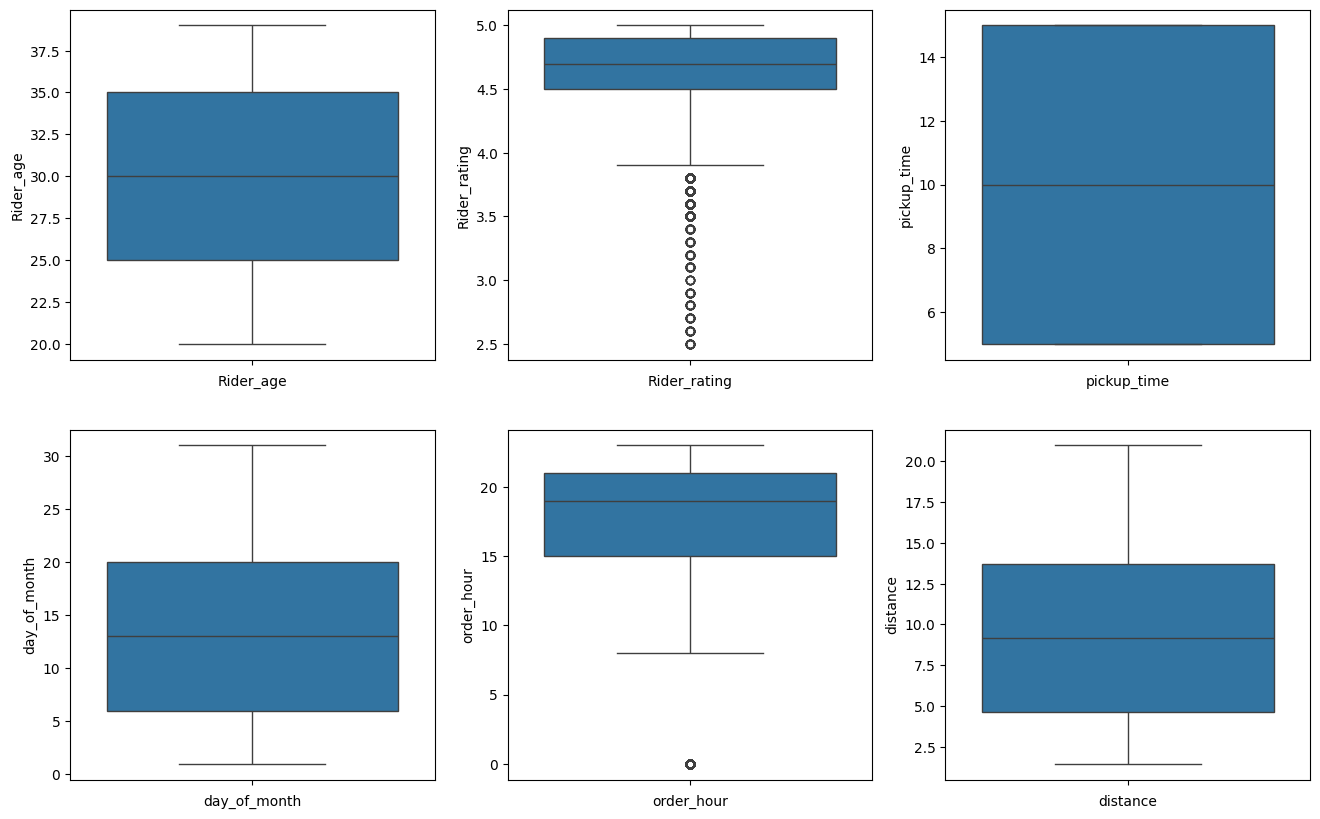

In [58]:
# boxplot for numerical cols
plt.figure(figsize=(16,10))
for i,col in enumerate(num):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
  plt.xlabel(col)
plt.show()

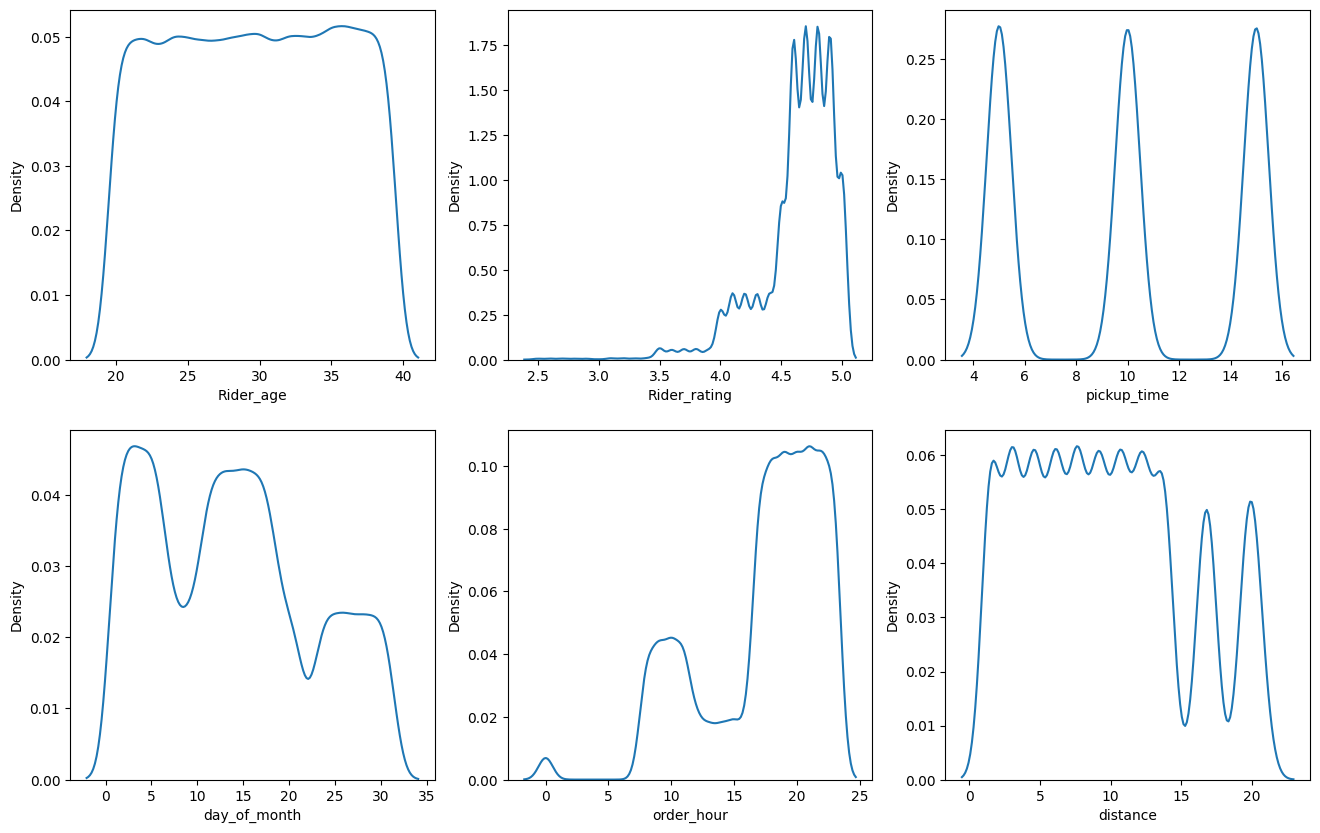

In [59]:
# kde plot for all numerical cols
plt.figure(figsize=(16,10))
for i,col in enumerate(num):
  plt.subplot(2,3,i+1)
  sns.kdeplot(df[col])
  plt.xlabel(col)
plt.show()

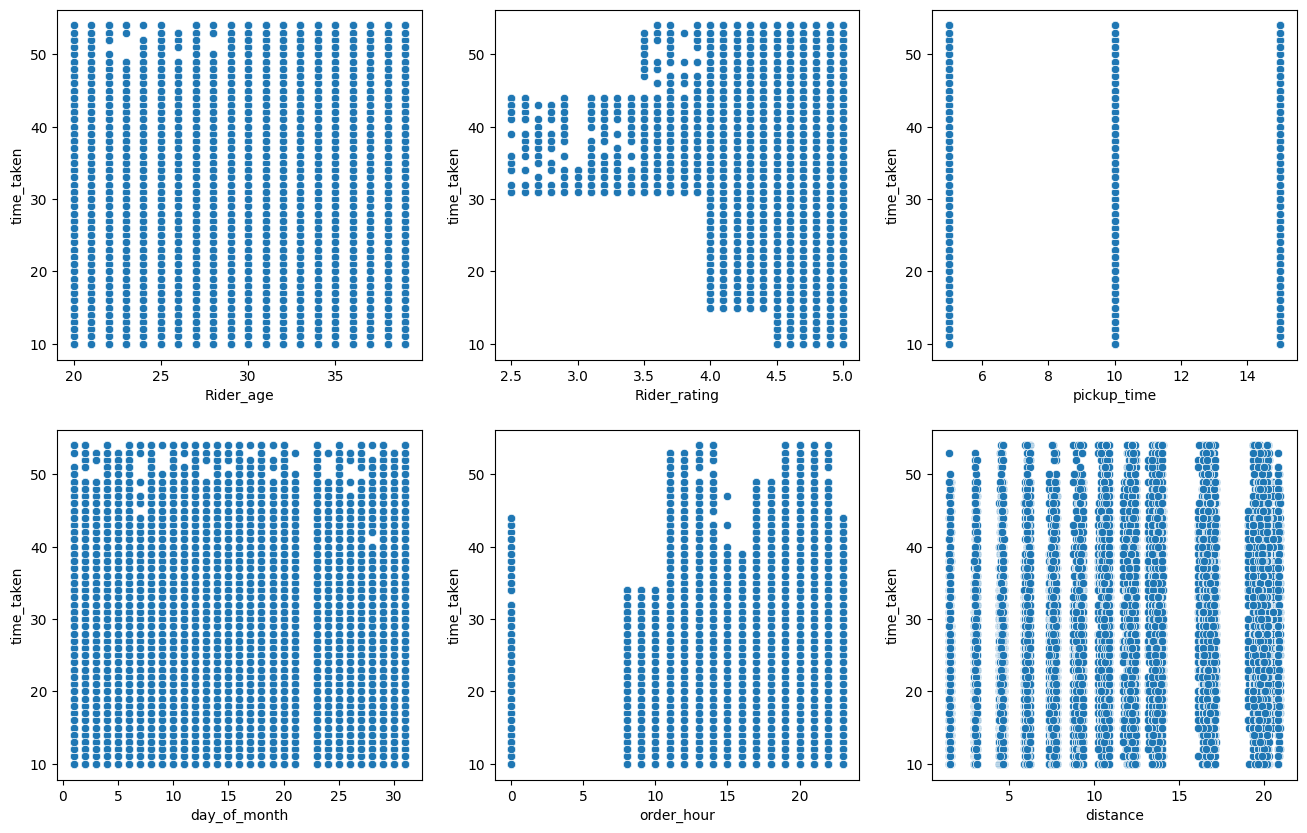

In [60]:
# scatterplot plot for all numerical columns
plt.figure(figsize=(16,10))
for i,col in enumerate(num):
  plt.subplot(2,3,i+1)
  sns.scatterplot(x=df[col],y=df['time_taken'])
  plt.xlabel(col)
  plt.ylabel('time_taken')
plt.show()

<Axes: >

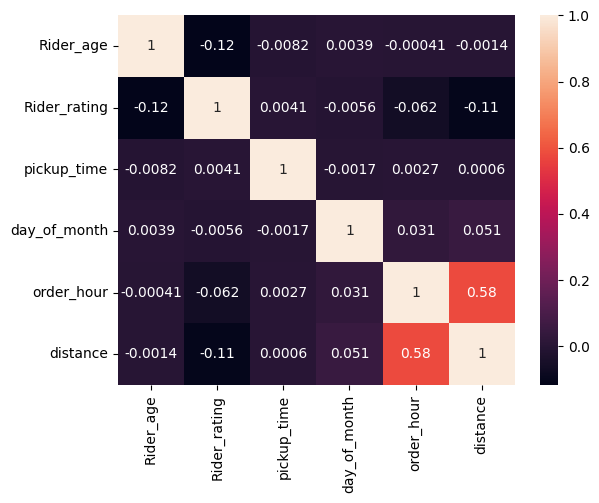

In [61]:
# correlation heatmap
sns.heatmap(df[num].corr(),annot=True)

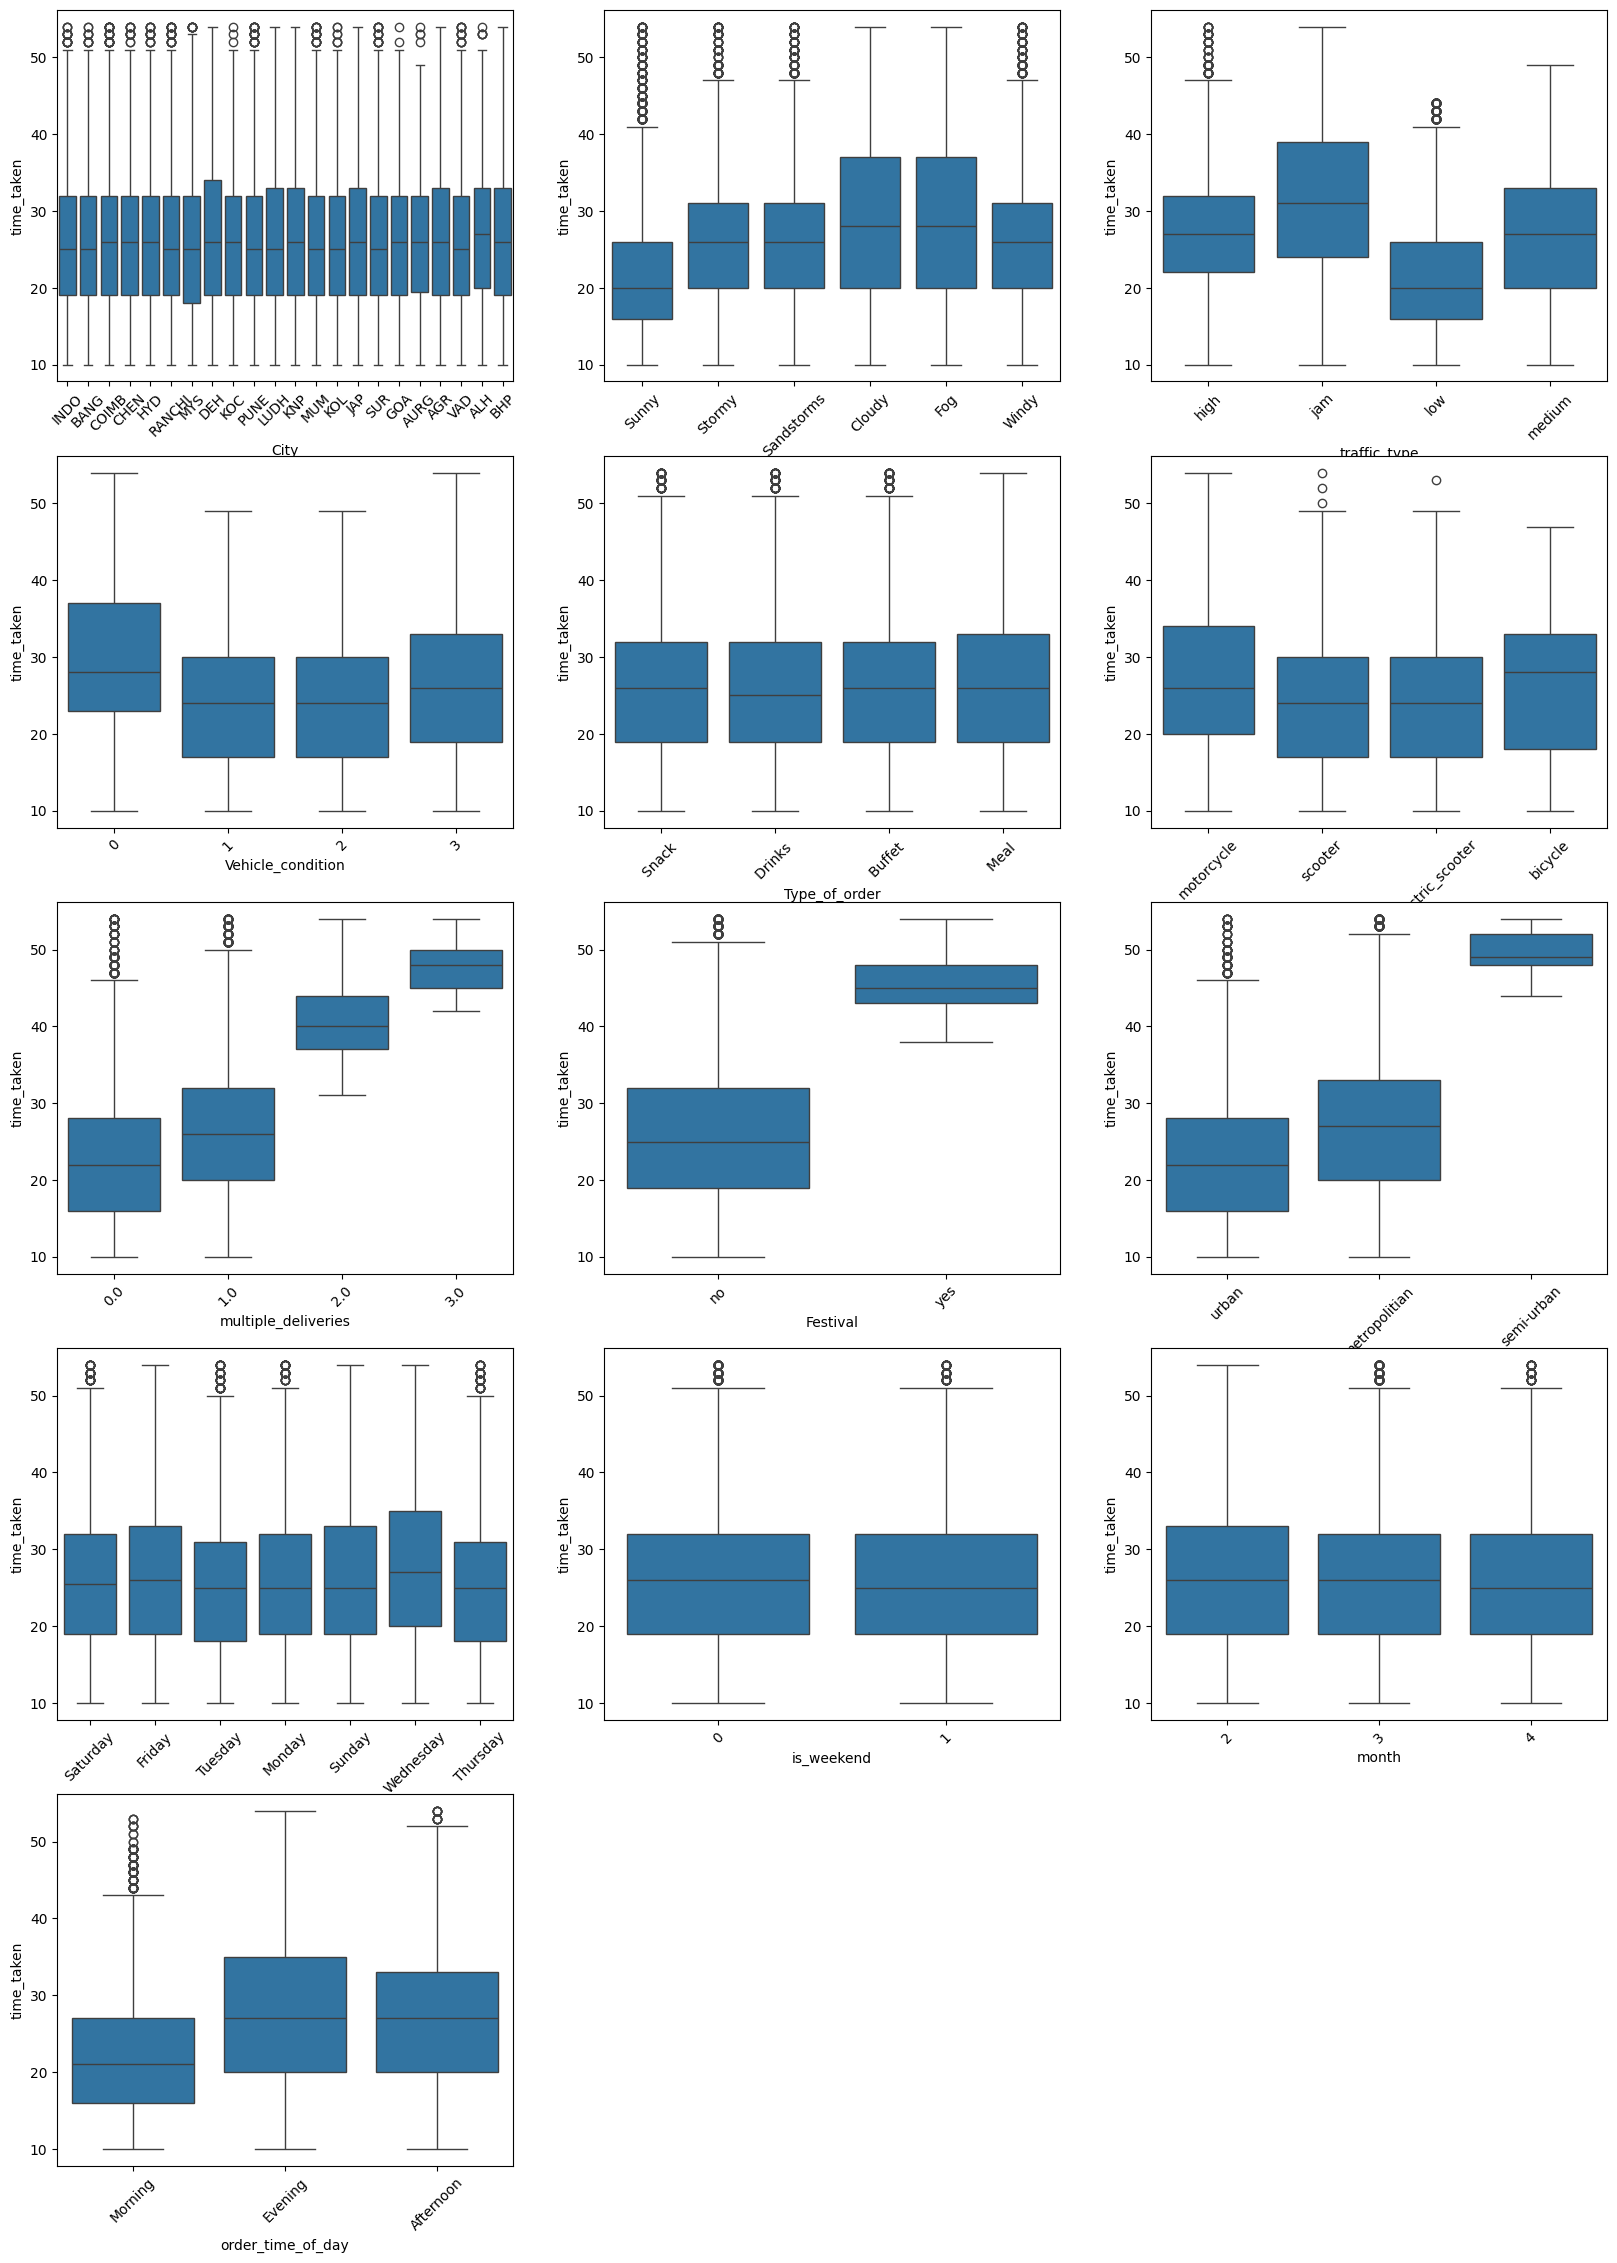

In [62]:
plt.figure(figsize=(20,28))
for i,col in enumerate(cat):
  plt.subplot(5,3,i+1)
  sns.boxplot(data=df, x=col, y='time_taken')
  plt.xticks(rotation=45)
plt.show()

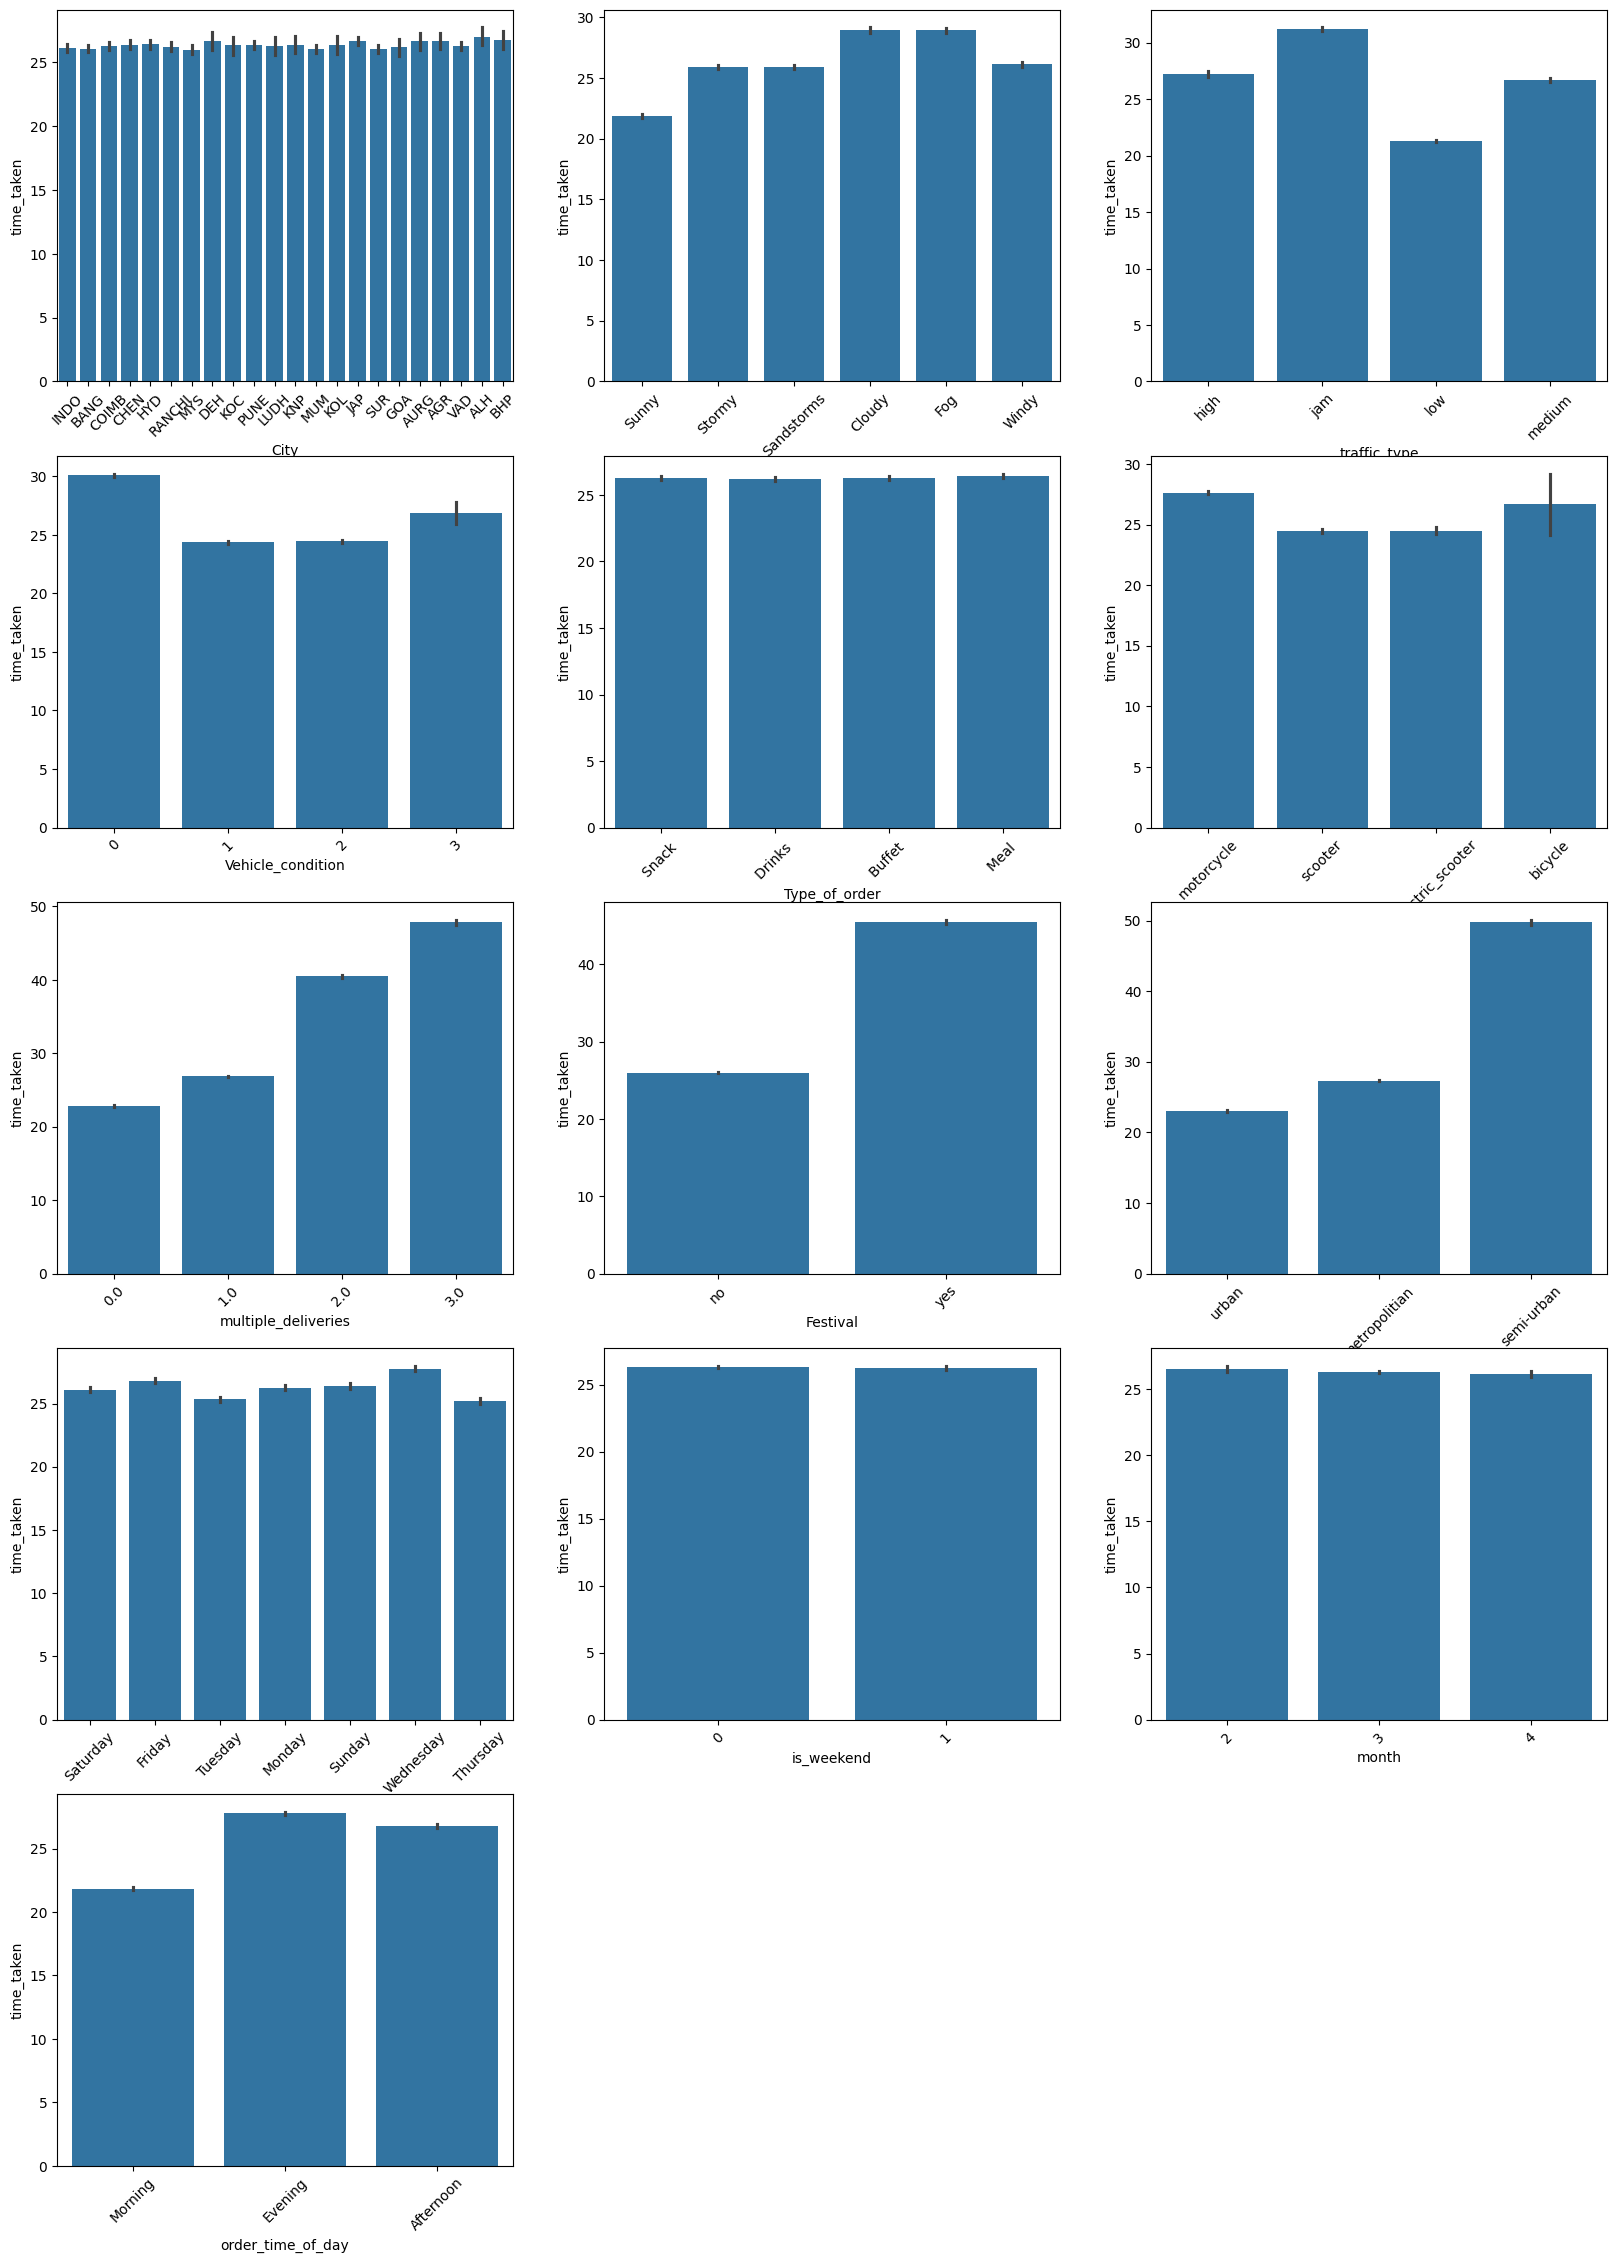

In [63]:
plt.figure(figsize=(20,28))
for i,col in enumerate(cat):
  plt.subplot(5,3,i+1)
  sns.barplot(data=df, x=col, y='time_taken', estimator=np.mean)
  plt.xticks(rotation=45)
plt.show()

## Missing Value imputation

In [128]:
df.select_dtypes('object').columns.to_list()

['City',
 'Weatherconditions',
 'traffic_type',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City_type',
 'weekday',
 'order_time_of_day']

In [123]:
from sklearn.preprocessing import LabelEncoder

le_dict = {}
df_encoded = df.drop(['time_taken'], axis=1)
for col in df.select_dtypes('object').columns.to_list():
    le = LabelEncoder()
    non_null = df_encoded[col][df_encoded[col].notna()]
    le.fit(non_null)
    le_dict[col] = le

    df_encoded[col] = df_encoded[col].map(lambda x: le.transform([x])[0] if pd.notna(x) else np.nan)

In [124]:
from sklearn.impute import KNNImputer

impute_cols = ['Rider_age', 'Rider_rating', 'pickup_time', 'Weatherconditions',
               'traffic_type', 'multiple_deliveries', 'Festival', 'City_type',
               'order_hour', 'order_time_of_day', 'distance']

imputer = KNNImputer(n_neighbors=5)
df_encoded[impute_cols] = imputer.fit_transform(df_encoded[impute_cols])


In [125]:
df_decoded = df_encoded.copy()
for col in df.select_dtypes('object').columns.to_list():
    le = le_dict[col]
    df_decoded[col] = df_decoded[col].map(
        lambda x: le.inverse_transform([int(x)])[0] if pd.notna(x) else np.nan
    )

In [126]:
df[impute_cols] = df_decoded[impute_cols]

In [ ]:
!pip install ydata-profiling

In [130]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_file("profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:01<00:00, 13.34it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [131]:
df.to_csv('cleaned_data_v2.csv', index=False)